# Topic: Wines Quality Classification Project
# Stage 1: Data Analysis

9. Classification of wine with the help of a learned network with a teacher (MLP) - directory: wine

    team: 2


    author: Natalia Jaśkowska
    
    index: 313900




# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach to analyzing and understanding datasets. EDA involves summarizing the main characteristics of a dataset using statistical and visualization methods. It is usually performed at the start of a data analysis project to gain insights into the data and develop hypotheses for further analysis. By examining the data in detail, EDA can help identify issues that need to be addressed before more advanced analysis can be performed.

The steps involved in Exploratory Data Analysis (EDA):

1. Data loading: The first step is to load the data into a software tool such as Python's Pandas library. 

2. Data inspection: Once the data is loaded, the next step is to inspect the data to understand its structure and characteristics. This can involve checking the number of rows and columns in the dataset, looking at the first few rows of the data using the head() function, checking data types using the dtypes attribute, and looking at summary statistics of the data using the describe() function. It's important to check for missing values, duplicates, and outliers as well.

3. Data cleaning: After inspecting the data, the next step is to clean the data. This can involve handling missing values, dropping duplicates, and transforming the data to the desired format.

4. Data visualization: Data visualization can be used to explore the data and communicate insights to others. Common visualization techniques used in EDA include histograms, scatter plots, box plots, and correlation matrices. Visualization tools such as matplotlib and seaborn can be used to create these visualizations.

5. Feature engineering: Feature engineering involves creating new features from existing ones to improve the performance of machine learning models. This can involve transforming features using mathematical functions, creating interaction terms, and converting categorical features into numeric ones.

6. Statistical analysis: Statistical analysis can be used to identify patterns and relationships in the data. Techniques such as hypothesis testing, correlation analysis, and regression analysis can be used to explore these relationships.

## Used modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [4]:
wine_white = pd.read_csv('~/Desktop/SNB/SNB_23L_projekt_dane/Wine_Quality_MLR/winequality-white.csv', sep=';')
wine_white['type'] = 'white'
wine_red = pd.read_csv('~/Desktop/SNB/SNB_23L_projekt_dane/Wine_Quality_MLR/winequality-red.csv', sep=';')
wine_red['type'] = 'red'

In [5]:
wine_red.shape

(1599, 13)

In [6]:
wine_white.shape

(4898, 13)

In [7]:
df = pd.concat([wine_white, wine_red]).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


**Conclusions**:

Data loading and inspection are important steps in any data analysis project. Overall, this code loads two separate wine datasets, adds a new column to each dataset indicating its type of wine, then concatenates them together into a single DataFrame and resets its index. The resulting DataFrame `df` contains information on both white and red wines, along with a column indicating the type of wine. The row and column numbers respectively are 6497 with 1599 records for the red wine and 4898 records for the white wine and 12 features with column `quality`.

## Data inspection

The `dataframe_summary` function takes in a Pandas DataFrame `df` and an optional argument `pred`. It returns a summary of the types, counts, distinct values, count of nulls, missing ratio, skewness, kurtosis, and unique values of each field/feature in the DataFrame. If the pred argument is provided, the function computes the correlation between each field/feature and the pred field/feature, and adds a corr column to the summary DataFrame. The corr column contains the correlation coefficients for each field/feature with the pred field/feature.

In [8]:
def dataframe_summary(df, pred=None):
    '''
    Returns the types, counts, distinct, count nulls, missing ratio and uniques values of each field/feature.
    '''
    summary = pd.DataFrame({
        'types': df.dtypes,
        'counts': df.count(),
        'distincts': df.nunique(),
        'nulls': df.isnull().sum(),
        'missing_ratio': (df.isnull().sum() / df.shape[0]) * 100,
        'skewness': df.skew(numeric_only=True),
        'kurtosis': df.kurt(numeric_only=True)
    })

    summary['uniques'] = [df[label].unique() for label, _ in summary.iterrows()]

    if pred is not None:
        summary['corr'] = df.corr(numeric_only=True).loc[:, pred]
        summary.rename(columns={'corr': f'corr {pred}'}, inplace=True)

    return summary

In [9]:
details = dataframe_summary(df, 'quality')
details

,types,counts,distincts,nulls,missing_ratio,skewness,kurtosis,uniques,corr quality
alcohol,float64,6497,111,0,0.0,0.565718,-0.531687,"[8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 10...",0.444319
chlorides,float64,6497,214,0,0.0,5.399828,50.898051,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.03...",-0.200666
citric acid,float64,6497,89,0,0.0,0.471731,2.397239,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37...",0.085532
density,float64,6497,998,0,0.0,0.503602,6.606067,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,...",-0.305858
fixed acidity,float64,6497,106,0,0.0,1.723290,5.061161,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ...",-0.076743
free sulfur dioxide,float64,6497,135,0,0.0,1.220066,7.906238,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16....",0.055463
pH,float64,6497,108,0,0.0,0.386839,0.367657,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,...",0.019506
quality,int64,6497,7,0,0.0,0.189623,0.232322,"[6, 5, 7, 8, 4, 3, 9]",1.000000
residual sugar,float64,6497,316,0,0.0,1.435404,4.359272,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2...",-0.036980
sulphates,float64,6497,111,0,0.0,1.797270,8.653699,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63...",0.038485


**Conclusion**:

Most valuable facts based on above `winequality` dataset:

1. The dataset has 6487 samples/records, with 1599 records for the red wine and 4898 records for the white wine.
2. The dataset contains 12 features, including the target variable 'quality', which ranges from 3 to 9.
3. There are no missing values in the dataset, which means that there is no need for imputation or removal of missing values.
4. The 'density' and 'alcohol' features have the highest correlation with the 'quality' feature, which suggests that these features may be important predictors of wine quality.
5. The 'residual sugar', 'free sulfur dioxide', 'ph', 'sulphates' features have the lowest absolute correlation with the 'quality' feature, which suggests that these features may not be strong predictors of wine quality.
6. The all types of features includes float64 except quality (int64).


## Descriptive Statistics

### Selected by Type
This code generates summary statistics for the 'red' and 'white' wines in the wine dataset, and combines them into a single table. The resulting table displays summary statistics for each numeric column in the wine dataset, separated by red and white wines. The statistics displayed include count, mean, standard deviation, minimum value, 25th percentile, median, 75th percentile, and maximum value. This allows for a quick comparison of the characteristics of the two types of wine.

In [10]:
red_samples = round(df.loc[df.type == 'red', df.columns].describe(),2)
white_samples= round(df.loc[df.type == 'white', df.columns].describe(),2)
pd.concat([red_samples, white_samples], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).transpose()

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

**Conclusion**:

The following are the highlights from the descriptive statistics presented above:

- The mean residual sugar and total sulfur dioxide content in white wine appears to be significantly higher than in red wine.
- Red wine has higher mean values of sulphates, fixed acidity, and volatile acidity compared to white wine.
- Citric acid is more commonly found in white wine than in red wine, as indicated by all of the numbers.
- Overall, white wines have roughly half the concentration of chlorides as red wines.
- Although the difference appears to be small, it is worth noting that the pH value is slightly higher in red wines.

## Selected by Quality
The resulting table displays summary statistics for each numeric column in the wine dataset, separated by quality label. 

In [11]:
df['quality_label'] = df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

low_samples = round(df[df['quality_label'] == 'low'][df.columns].describe(),2)
medium_samples= round(df[df['quality_label'] == 'medium'][df.columns].describe(),2)
high_samples = round(df[df['quality_label'] == 'high'][df.columns].describe(),2)
with pd.option_context('display.max_columns', 50):
    display(pd.concat([low_samples, medium_samples, high_samples], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).transpose())

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine                       \
                         75%     max               count    mean    std   min   
fixed acidity           7.80   15.90              3915.0    7.16   1.31  3.80   
volatile acidity        0.50    1.58              3915.0    0.31   0.14  0.08   
citric acid             0.40    1.00              3915.0    0.33   0.13  0.00   
residual sugar          8.52   23.50              3915.0    5.32   4.68  0.70   
chlorides               0.08    0.61              3915.0    0.05   0.03  0.01   
free sulfur dioxide    42.00  289.00              3915.0   30.96  16.33  1.00   
total sulfur dioxide  167.00  440.00              3915.0  113.51  53.57  6.00   
density                 1.00    1.00              3915.0    0.99   0.00  0.99   
pH                      3.31    3.90              3915.0    3.22   0.16  2.72   
sulphates               0.58    2.00              3915.0    0.54   0.15  0.22   
alcohol                10.40   14.90              3915.0   10.81   1.20  8.40   
quality                 5.00    5.00              3915.0    6.28   0.45  6.00   

                                                    High Quality Wine          \
                        25%     50%     75%     max             count    mean   
fixed acidity          6.40    6.90    7.60   15.60             198.0    6.85   
volatile acidity       0.21    0.27    0.36    1.04             198.0    0.29   
citric acid            0.26    0.31    0.39    1.66             198.0    0.33   
residual sugar         1.80    3.00    7.90   65.80             198.0    5.35   
chlorides              0.04    0.04    0.06    0.42             198.0    0.04   
free sulfur dioxide   19.00   29.00   41.00  112.00             198.0   34.51   
total sulfur dioxide  81.00  116.00  150.00  294.00             198.0  117.48   
density                0.99    0.99    1.00    1.04             198.0    0.99   
pH                     3.11    3.21    3.33    4.01             198.0    3.23   
sulphates              0.43    0.51    0.61    1.95             198.0    0.51   
alcohol                9.80   10.80   11.70   14.20             198.0   11.69   
quality                6.00    6.00    7.00    7.00             198.0    8.03   

                                                                   
                        std    min    25%     50%     75%     max  
fixed acidity          1.14   3.90   6.20    6.80    7.30   12.60  
volatile acidity       0.12   0.12   0.21    0.28    0.35    0.85  
citric acid            0.10   0.03   0.28    0.32    0.37    0.74  
residual sugar         4.16   0.80   2.00    4.05    7.57   14.80  
chlorides              0.02   0.01   0.03    0.04    0.04    0.12  
free sulfur dioxide   17.08   3.00  24.00   34.00   43.00  105.00  
total sulfur dioxide  41.69  12.00  96.00  118.50  145.00  212.50  
density                0.00   0.99   0.99    0.99    0.99   

**Conclusion**:

Here are the highlights from the descriptive statistics of quality perspective presented above:

- It is interesting to note that alcohol content alone does not provide a significant distinction between white and red wines. However, it does have a noticeable impact on quality. On average, the alcohol concentration increases by about 1% for each quality level, with higher quality wines having higher alcohol content. Lower quality wines have the lowest standard deviation in alcohol concentration.
- Wines of higher quality tend to have lower levels of chlorides and volatile acidity. Additionally, the standard deviation of these two factors is smaller in higher quality wines.
- Free sulfur dioxide content is generally higher in wines of higher quality, but their standard deviation decreases as the quality increases.
- Mean quality wines have slightly higher standard deviation in fixed acidity, but overall, higher quality wines tend to have less fixed acidity.

## Analysis of variance (ANOVA)

Analysis of Variance, is a statistical method used to test for differences between two or more groups. In the context of the wine quality dataset, ANOVA could be used to test whether there are significant differences in the mean values of a particular feature between wines of different quality levels.

Each line reports the F statistic and p-value for a specific feature, as well as the conclusion drawn from the null hypothesis. The F statistic is a measure of the ratio of variation between groups to variation within groups. The p-value indicates the probability of observing the difference in means between the groups by chance, assuming that there is no true difference between the groups. The null hypothesis is rejected if the p-value is less than the chosen significance level (usually 0.05), indicating that there is evidence of a significant difference between the groups.

In [12]:
from scipy.stats import f_oneway

def anova_test(df, feature, category_col, categories):
    print(f"ANOVA test across wine samples with different {category_col}s:")
    
    samples = [df[df[category_col] == cat][feature] for cat in categories]
    F, p = f_oneway(*samples)
    
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    
    print('F Statistic: {:.2f} \tp-value: {:.3f} \tNull Hypothesis: {}'.format(F, p, msg))
    print()

for feature in df.columns:
    if feature not in ['type', 'quality_label']:
        print(f'Feature name: {feature}')
        anova_test(df, feature, 'type', ['red', 'white'])

Feature name: fixed acidity
ANOVA test across wine samples with different types:
F Statistic: 2016.51 	p-value: 0.000 	Null Hypothesis: Reject

Feature name: volatile acidity
ANOVA test across wine samples with different types:
F Statistic: 4829.32 	p-value: 0.000 	Null Hypothesis: Reject

Feature name: citric acid
ANOVA test across wine samples with different types:
F Statistic: 236.39 	p-value: 0.000 	Null Hypothesis: Reject

Feature name: residual sugar
ANOVA test across wine samples with different types:
F Statistic: 899.77 	p-value: 0.000 	Null Hypothesis: Reject

Feature name: chlorides
ANOVA test across wine samples with different types:
F Statistic: 2315.83 	p-value: 0.000 	Null Hypothesis: Reject

Feature name: free sulfur dioxide
ANOVA test across wine samples with different types:
F Statistic: 1858.14 	p-value: 0.000 	Null Hypothesis: Reject

Feature name: total sulfur dioxide
ANOVA test across wine samples with different types:
F Statistic: 6252.80 	p-value: 0.000 	Null Hyp

**Conclusion**:

In all of the cases shown, the null hypothesis is rejected, indicating that there is a significant difference in the means of the feature being tested between the red and white wine samples. For example, the line (alcohol) reports a p-value of 0.008 for a feature that was tested, indicating that there is evidence of a significant difference in the means of this feature between red and white wines, with the null hypothesis being rejected.

## Checking for outliers


The code generates a grid of boxplots, one for each numeric attribute in the wine dataset, except for the 'quality_label' and 'type' columns. The purpose of the boxplot is to visualize the distribution of each attribute, including the median, quartiles, and outliers.

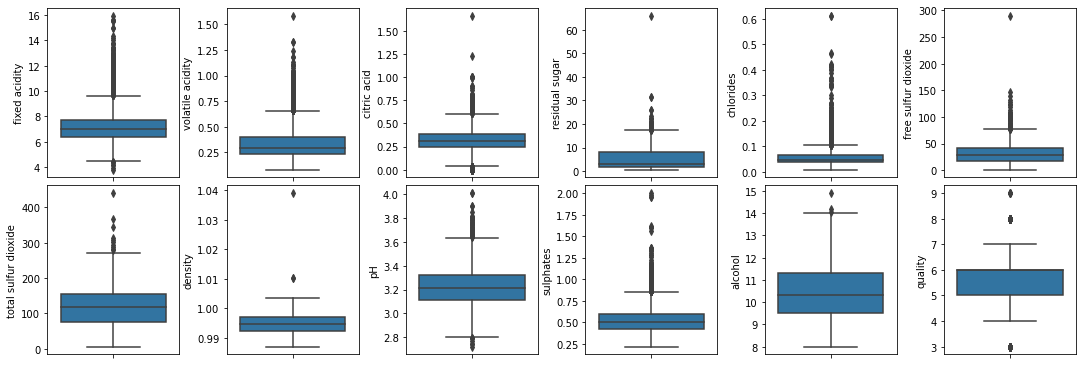

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15,5))
ax = ax.flatten()
idx = 0
for attribute in df.columns:
    if attribute not in ['quality_label', 'type']:
        sns.boxplot(ax=ax[idx], y=df[attribute])
        idx += 1
plt.tight_layout(pad=0.4)
sns.set_style('whitegrid')

Each of the features listed above has outliers. 

## Data cleaning

### Check for missing values

In [14]:
plt.figure(figsize=(10,8))
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
quality_label           0
dtype: int64

<Figure size 720x576 with 0 Axes>

Dataset has no missing values. If there would be missing values in the dataset, one approach to dealing with them is to delete the relevant rows or columns.

### Check for duplicate rows

In [15]:
df.query('type == "red"').duplicated().sum(), df.query('type == "white"').duplicated().sum()

(240, 937)

This code calculates the percentage of duplicate rows in the red and white wine subsets of the wine quality dataset.

In [16]:
df.query('type == "red"').duplicated().mean(), df.query('type == "white"').duplicated().mean()

(0.150093808630394, 0.19130257247856267)

The first value represents the percentage of duplicate rows in the red wine subset of the dataset, and the second value represents the percentage of duplicate rows in the white wine subset of the dataset.
Calculates by percent there are 15% of red wine and 19% of white wine.

## Distributions of the data in the qualities by wine types

The term "balanced classes" typically refers to a situation where the classes in a classification problem have roughly equal proportions in the dataset. Once we have dealt with the null values, we will examine the data distributions of the different quality types. We will then confirm the class imbalance, particularly with regards to the scarcity of high-quality cases.

In [17]:
def check_imbalance_plot(df, quality_col='quality', type_col='type'):
    '''
    Checks for class imbalances in the 'quality' column and plots a bar chart ordered by the type of wine.
    '''
    imbalance = df.groupby([type_col, quality_col]).size().unstack()
    print("Imbalance between classes:\n", imbalance)

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x=quality_col, hue=type_col)
    plt.title("Number of Samples per Wine Type and Quality", fontsize=16, fontweight='bold')
    plt.ylabel("Number of Samples", fontsize=14)
    plt.xlabel("Wine Type", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Quality", title_fontsize=12, fontsize=12, loc='upper right')

    # Customize grid and spines
    sns.despine(left=True, bottom=True)
    ax.yaxis.grid(True, linestyle='--', linewidth=1)
    plt.show()

Imbalance between classes:
 quality     3      4       5       6      7      8    9
type                                                   
red      10.0   53.0   681.0   638.0  199.0   18.0  NaN
white    20.0  163.0  1457.0  2198.0  880.0  175.0  5.0


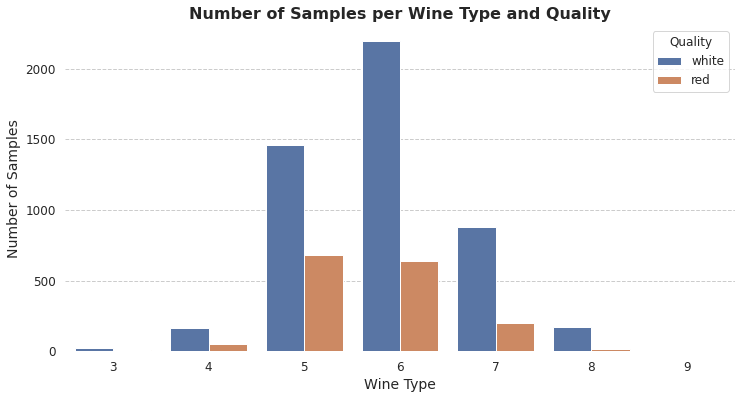

In [18]:
check_imbalance_plot(df)

The class imbalance in the wine quality dataset can be problematic for machine learning models, as the model may be biased towards the more prevalent classes, leading to inaccurate predictions or poor model performance.

**Conclusion**:

1. The imbalance between classes is evident in the table or countplot, as there are significantly more samples in the middle quality levels (5 and 6) than in the lower and higher quality levels. For example, in the red wine subset, there are only 10 samples in quality level 3 and 18 samples in quality level 8, compared to 681 samples in quality level 5 and 638 samples in quality level 6.
2. In the white wine subset, the imbalance is even more pronounced, with only 20 samples in quality level 3 and 5 samples in quality level 9, compared to 1457 samples in quality level 5 and 2198 samples in quality level 6.


## Check for correlations based on wines types

### Corelation matrix of White and Red Wine
The code provided generates a heatmap that shows the correlation matrix between the different features (columns) of the wine quality dataset, separately for the red and white wine subsets. The correlation matrix is a table that shows the correlation coefficients between each pair of features, with values ranging from -1 to 1, where 1 indicates a strong positive correlation and -1 indicates a strong negative correlation.

Text(0.5, 1.0, 'Corelation Matrix -- white and red wines')

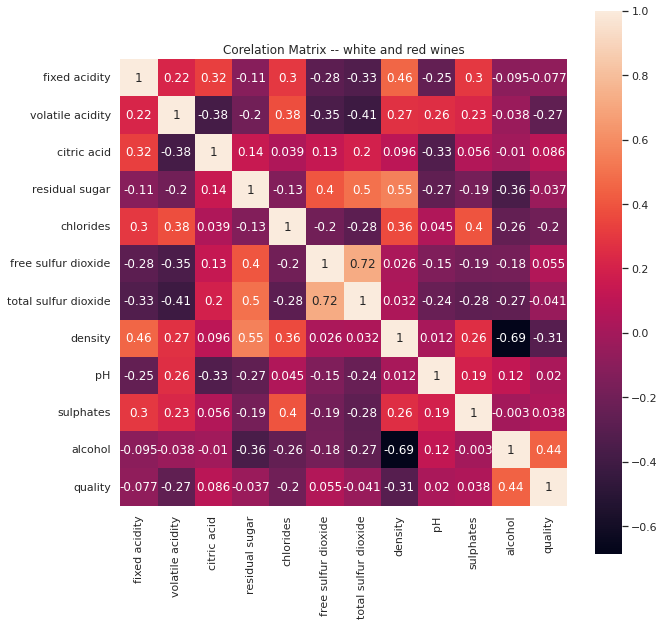

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True)
plt.title('Corelation Matrix -- white and red wines')

In [20]:
print('Another (more clear) view of correlations among features:\n')
df.corr(numeric_only=True).style.background_gradient(cmap="coolwarm")

Another (more clear) view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


**Conclusions**:

While most of the correlations are weak, we can see that:

- Total sulfur dioxide and free sulfur dioxide these two features have a strong positive correlation with each other (correlation coefficient of 0.72). In fact, the second is a parcel of the first and it is represent a colinearity that can be a problamem for linear classifiers, special if the target will predict the color, in that case we need drop the free sulfur dioxide.
- Density and alcohol: These two features have a strong negative correlation with each other (correlation coefficient of -0.69).
- The residual sugar has a half relation to the total sulfur dioxide and 0.40 with free, it is a god indication that wich more residual sugar more sulfur dioxide is added by the winemaker. The 0.5 indicates that white wine tend to have more residual sugar then red wine.
- Densite has a relatively high positive correlation to residual sugar and relatively high negative correlation to alcohol.



 ### Wine Features Pairwise Plots by Types 
 This code creates a pairwise plot of the wine attributes in the wines DataFrame, with different colors for red and white wines. It also sets the font scale and adjusts the layout of the plot, and adds a title to it.

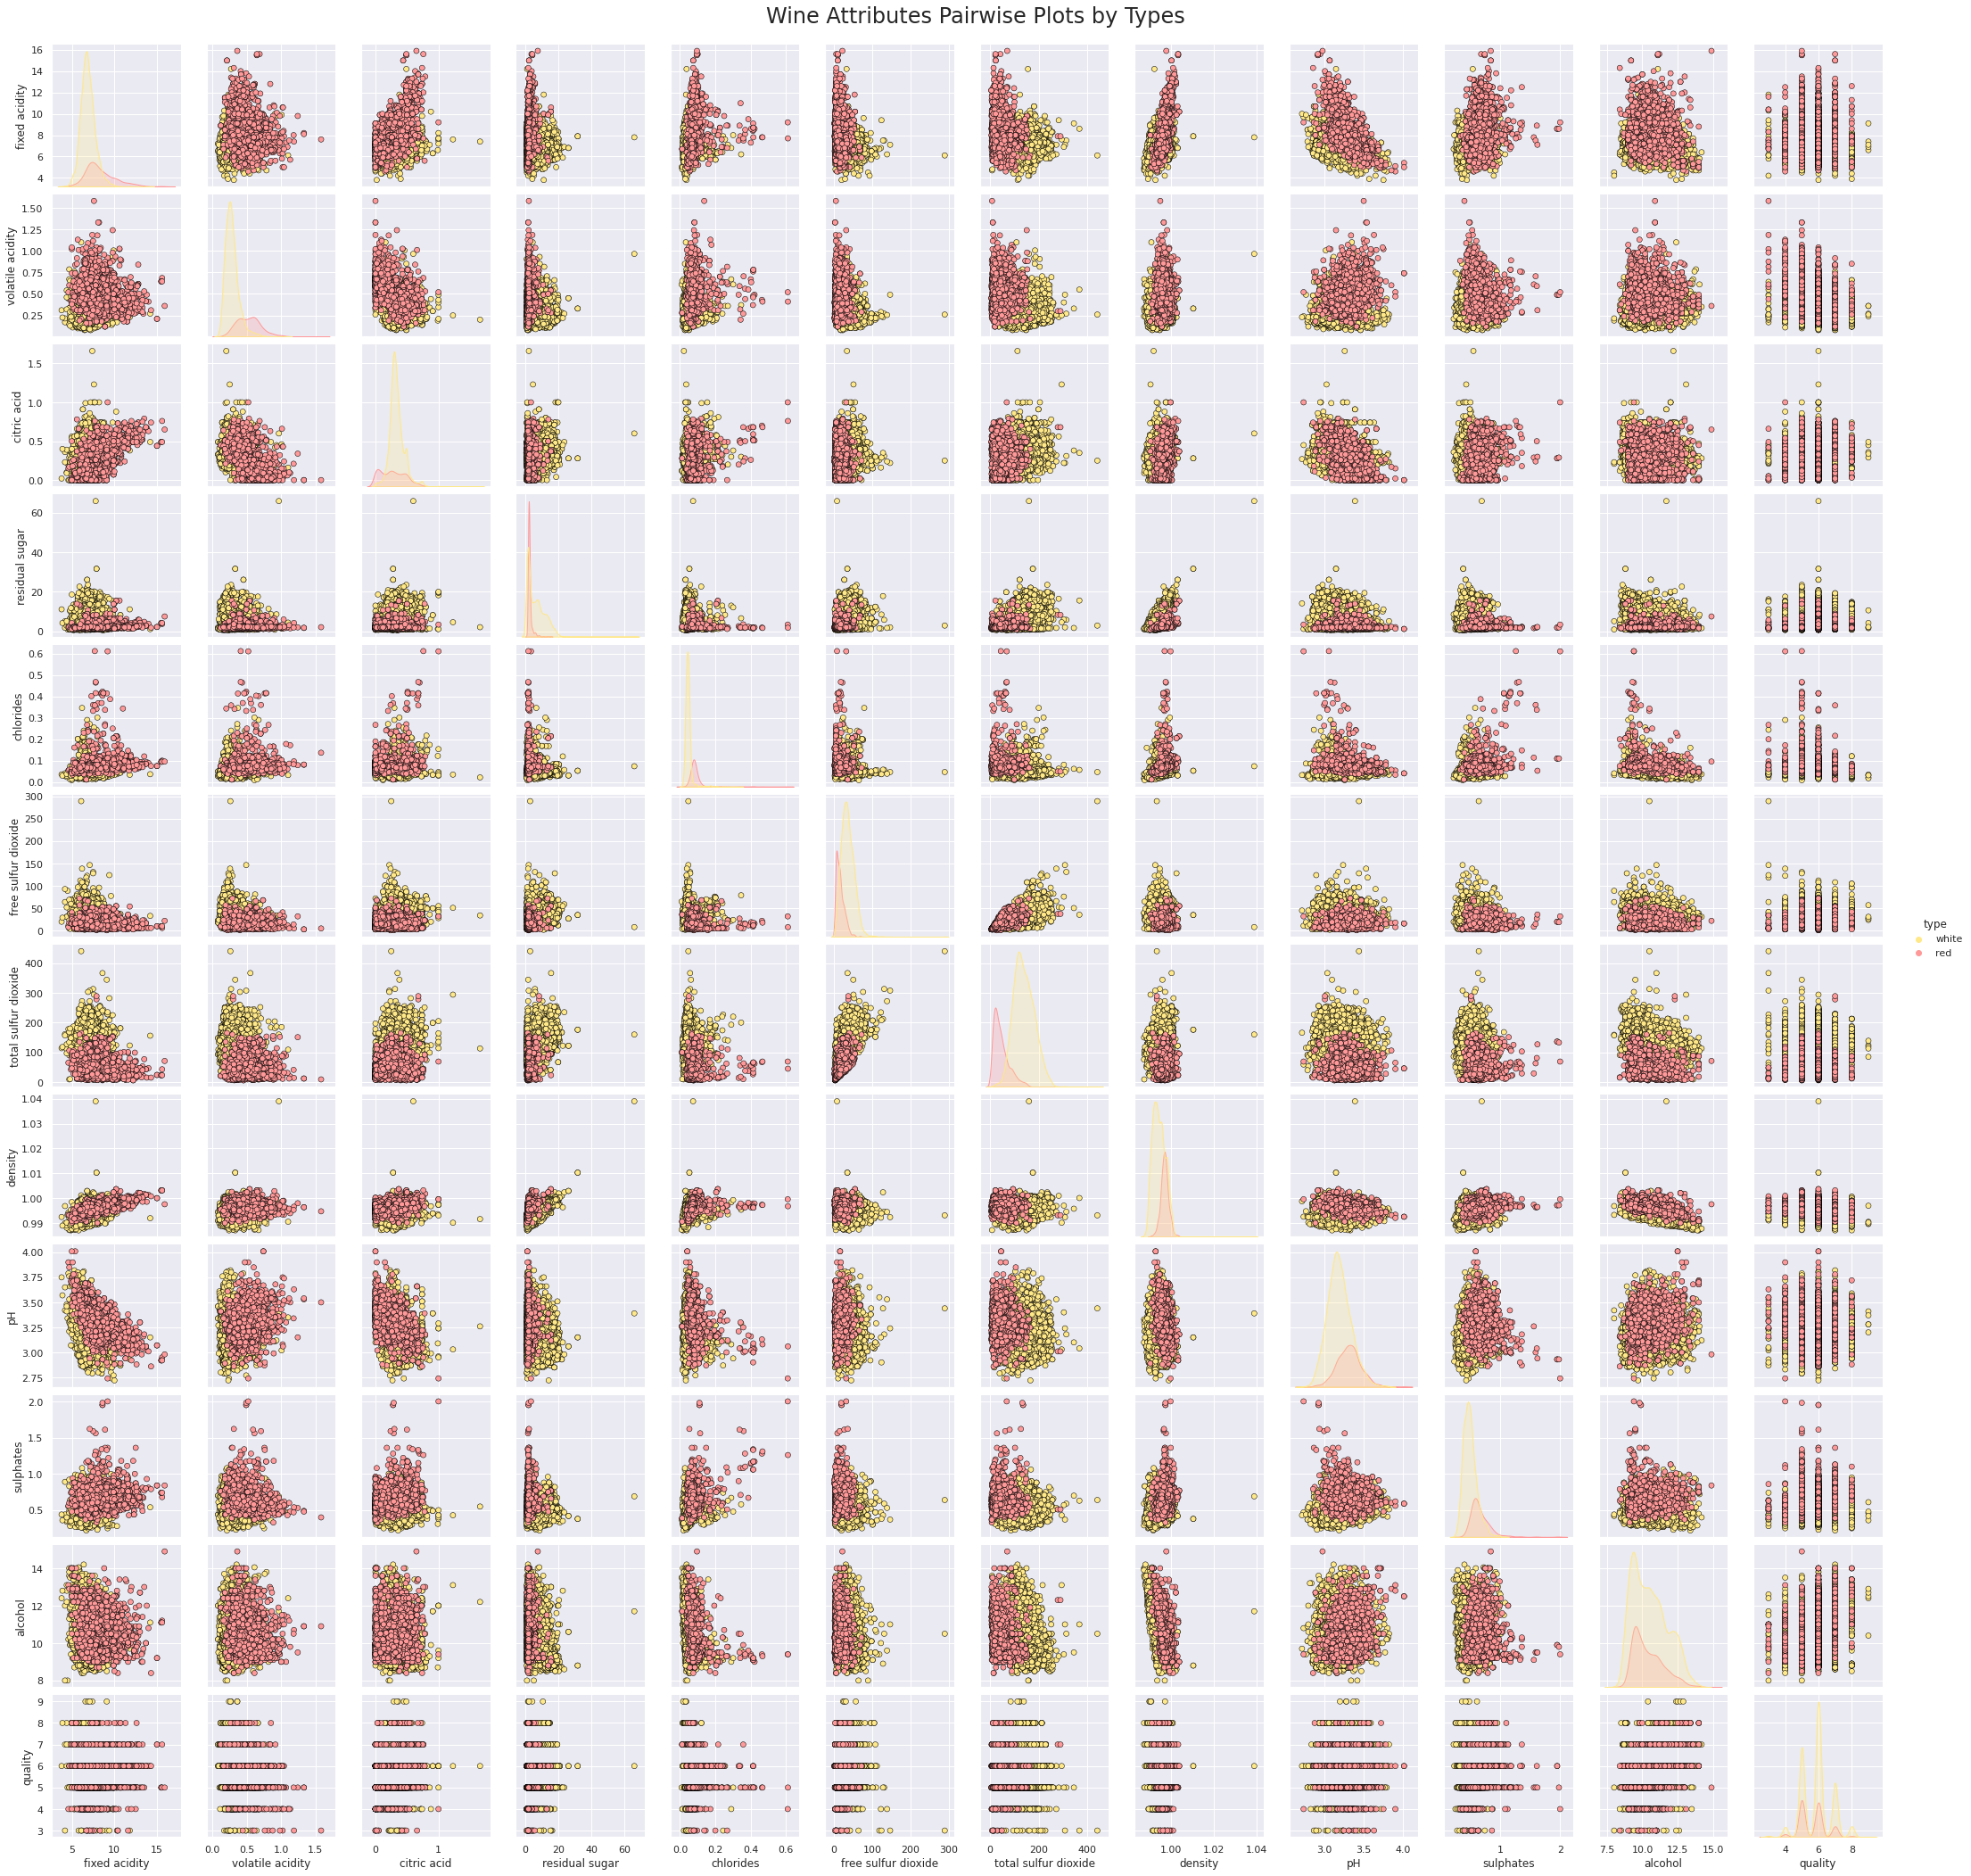

In [21]:
sns.set(font_scale=1.0)
g = sns.pairplot(data=df, hue='type', palette={'red': '#FF9999', 'white': '#FFE888'},
                 plot_kws=dict(edgecolor='black', linewidth=0.5))
fig = g.fig
fig.subplots_adjust(top=0.96, wspace=0.2)
t = fig.suptitle('Wine Attributes Pairwise Plots by Types', fontsize=24)

**Conclusions**:

The pair plot reveals interesting patterns that align with our ANOVA test and correlations:

1. Residual sugar, total sulfur dioxide, and citric acid are higher in white wine compared to red wine.
2. Sulphates, fixed acidity, and volatile acidity are higher in red wine compared to white wine.
3. Density has a slightly strong negative correlation with alcohol, as evidenced by the downward trend of points from left to right.
4. Density has a slightly strong positive correlation with residual sugar, which is reinforced by two white wine outliers.

## Corelation matrix of Red Wine
The code provided generates a heatmap that shows the correlation matrix between the different features (columns) of the red wine subset of the wine quality dataset.

Text(0.5, 1.0, 'Corelation Matrix -- red wine')

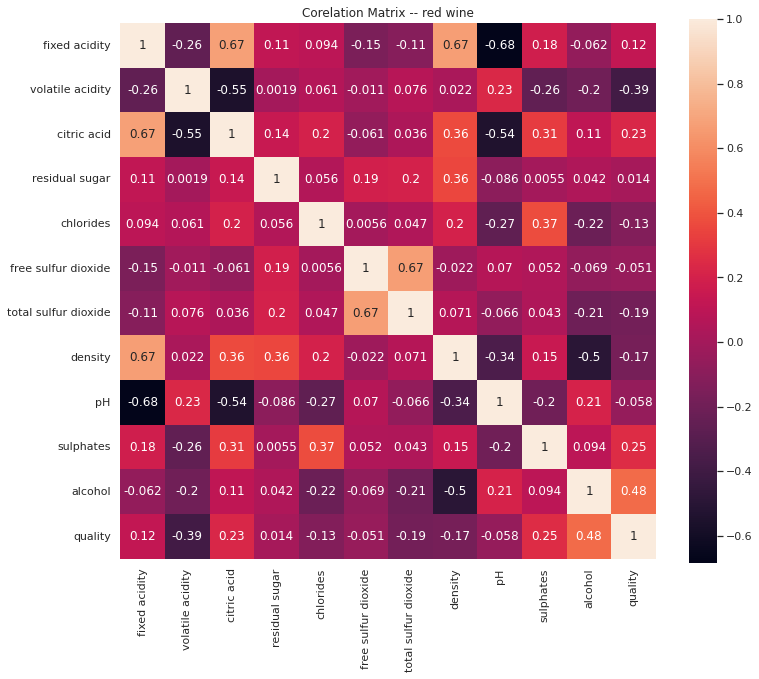

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.query('type == "red"').corr(numeric_only=True), annot=True, square=True)
plt.title('Corelation Matrix -- red wine')

**Conclusions**:

1. The most highly correlated variables in the dataset are total sulfur dioxide and free sulfur dioxide, with a correlation coefficient of 0.72. 
2. Other variables that are moderately correlated include citric acid and fixed acidity (0.67), density and fixed acidity (0.46), density and residual sugar (0.36), and pH and citric acid (-0.54).

## Corelation matrix of White Wine
The code provided generates a heatmap that shows the correlation matrix between the different features (columns) of the white wine subset of the wine quality dataset.

Text(0.5, 1.0, 'Corelation Matrix -- white wine')

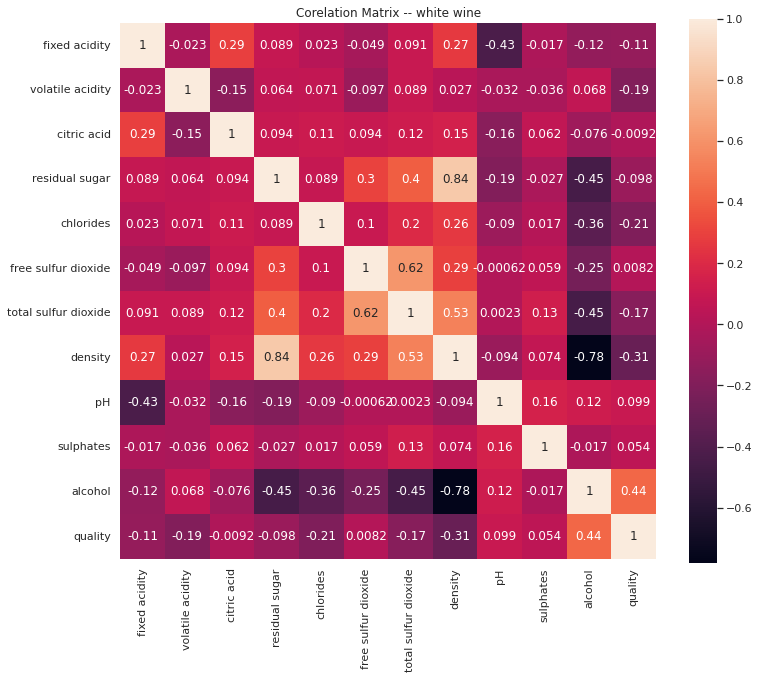

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.query('type == "white"').corr(numeric_only=True), annot=True, square=True)
plt.title('Corelation Matrix -- white wine')

**Conclusions**:
1. In the correlation matrix for the wine quality dataset, we can see that some of the variables are strongly positively correlated with quality, such as alcohol (correlation coefficient of 0.44), while others are strongly negatively correlated with quality, such as volatile acidity (correlation coefficient of -0.39). Other variables show weaker correlations with quality.
2. The correlation matrix for the white wine subset also shows some variables with strong positive or negative correlations with quality, such as alcohol and density (correlation coefficient of -0.78). However, the correlations in this subset are generally weaker than those in the red wine subset.

# Feature Scaling -  Normalization and Standardization

In first step we will remove duplicates.

In [24]:
df = df.drop_duplicates()
print(f'The length of modified wine quality dataset is {len(df)}.')

The length of modified wine quality dataset is 5320.


This code imports the `StandardScaler` and `MinMaxScaler` classes from the sklearn.preprocessing module, which are used for scaling numerical data. Then creates a sorted list of feature column names from a Pandas DataFrame `df`, excluding the columns named `type`, `quality`, and `quality_label`. These excluded columns are likely non-numeric or categorical columns, which should not be scaled. The `fit_transform()` method is then called on both scalers, with the data to be transformed provided as input.

Then `scaled_data_standard` contains the standardized (i.e., normally distributed) version of the input data, with a mean of 0 and standard deviation of 1 for each column. `scaled_data_minmax` contains the data scaled to a range between 0 and 1, where the minimum value of each column is transformed to 0 and the maximum value is transformed to 1.

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

feature_columns = sorted(set(df.columns) - {'type', 'quality', 'quality_label'})

standard_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
minmax_scaler = MinMaxScaler()

scaled_data_standard = standard_scaler.fit_transform(df[feature_columns].values)
scaled_data_minmax = minmax_scaler.fit_transform(df[feature_columns].values)

The `display()` function is used to display the resulting DataFrame with formatted output. The output shows the descriptive statistics for all the columns in the original DataFrame and the two scaled DataFrames

In [26]:
df1 = df.copy()
df2 = df.copy()
df1[feature_columns] = scaled_data_standard
df2[feature_columns] = scaled_data_minmax
with pd.option_context('display.max_columns', 50):
    display(pd.concat([df.describe(), df1.describe(), df2.describe()], axis=0, keys=['original', 'standard scaled', 'min max scaled']).transpose())

original                                           \
                        count        mean        std      min      25%   
fixed acidity          5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity       5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid            5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar         5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides              5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide    5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide   5320.0  114.109023  56.774223  6.00000  74.0000   
density                5320.0    0.994535   0.002966  0.98711   0.9922   
pH                     5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates              5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol                5320.0   10.549241   1.185933  8.00000   9.5000   
quality                5320.0    5.795677   0.879772  3.00000   5.0000   

                                                      standard scaled  \
                            50%        75%        max           count   
fixed acidity           7.00000    7.70000   15.90000          5320.0   
volatile acidity        0.30000    0.41000    1.58000          5320.0   
citric acid             0.31000    0.40000    1.66000          5320.0   
residual sugar          2.70000    7.50000   65.80000          5320.0   
chlorides               0.04700    0.06600    0.61100          5320.0   
free sulfur dioxide    28.00000   41.00000  289.00000          5320.0   
total sulfur dioxide  116.00000  153.25000  440.00000          5320.0   
density                 0.99465    0.99677    1.03898          5320.0   
pH                      3.21000    3.33000    4.01000          5320.0   
sulphates               0.51000    0.60000    2.00000          5320.0   
alcohol                10.40000   11.40000   14.90000          5320.0   
quality                 6.00000    6.00000    9.00000          5320.0   

                                                                            \
                              mean       std       min       25%       50%   
fixed acidity         3.419153e-16  1.000094 -2.588145 -0.617772 -0.163070   
volatile acidity     -4.273941e-17  1.000094 -1.570028 -0.678405 -0.262314   
citric acid           4.273941e-17  1.000094 -2.164515 -0.533454 -0.057728   
residual sugar        0.000000e+00  1.000094 -0.988604 -0.721923 -0.521912   
chlorides             1.282182e-16  1.000094 -1.293816 -0.507052 -0.262884   
free sulfur dioxide   4.273941e-17  1.000094 -1.630964 -0.788427 -0.114397   
total sulfur dioxide -8.547883e-17  1.000094 -1.904371 -0.706532  0.033310   
density               1.853822e-14  1.000094 -2.504125 -0.787562  0.038682   
pH                    6.197215e-16  1.000094 -3.146985 -0.715020 -0.091439   
sulphates            -2.136971e-17  1.000094 -2.092831 -0.690295 -0.155996   
alcohol               6.838306e-16  1.000094 -2.149768 -0.884822 -0.125855   
quality               5.795677e+00  0.879772  3.000000  5.000000  6.000000   

                                          min max scaled                      \
                           75%        max          count      mean       std   
fixed acidity         0.367415   6.581671         5320.0  0.282246  0.109064   
volatile acidity      0.391543   7.346207         5320.0  0.176086  0.112166   
citric acid           0.553919   9.116989         5320.0  0.191864  0.088649   
residual sugar        0.544812  13.501067         5320.0  0.068228  0.069021   
chlorides             0.252582  15.038318         5320.0  0.079219  0.061235   
free sulfur dioxide   0.615802  14.545748         5320.0  0.100822  0.061823   
total sulfur dioxide  0.689479   5.740662         5320.0  0.249099  0.130816   
density               0.753636  14.988637         5320.0  0.143152  0.057172   
pH                    0.656858   4.897208         5320.0  0.391212  

**Conclusion**:

1. In orignal dataset the value of std is more inbalanced comparing to formatted data. For example value of feature `total sulfur dioxide` in orginal dataset is 56.7 but in stadard_scaler data value is 1 and in min_max scaled data 0.1.
2. The similar conclusion applies to the value of the mean (the value of `total sulfur dioxide` in origanl data is 114 but in scaled data is close to zero.

# Train and Test data split

In [34]:
def load_preprocessed_data():
    '''
    Loads data and splits them to X and Y
    '''
    modified_data = df.drop(columns=['quality', 'quality_label', 'type'], axis=1) 
    target = df['quality']
    return standard_scaler.transform(modified_data.values), target.values - 3

In [35]:
from sklearn.model_selection import train_test_split

X, Y = load_preprocessed_data()

The `train_test_split` function is used to split the data into training (70%) and testing (30%) subsets. Also The `random_state` parameter is set to a fixed value (42 in this case) to ensure that the split is reproducible.

Splitting a dataset into training and testing sets with a 70:30 ratio is a common practice in machine learning. The training set is used to fit the model, while the testing set is used to evaluate its performance. The exact ratio of the split can vary depending on the size of the dataset and the nature of the problem being solved, but a 70:30 split is often used as a starting point.

# Modeling - Classifier Models

This code segment is responsible for training and evaluating different classifiers on a dataset based on cross-validation. For each classifier and each fold, the training data is used to fit the classifier using `clf.fit()`. The classifier is then used to predict the labels for the validation data using `clf.predict()`. The accuracy of the classifier's predictions is then calculated using `accuracy_score()`, and the accuracy score is appended to the `accuracies` list for the current classifier. Then the bar plot displays the mean accuracy score for each classifier along with the standard deviation of the accuracy scores across all folds.

Random Forest Accuracy: 0.5692 +/- 0.0180
Support Vector Classifier Accuracy: 0.4374 +/- 0.0042
K-Nearest Neighbors Accuracy: 0.4047 +/- 0.0183
Gaussian Naive Bayes Accuracy: 0.4780 +/- 0.0090
Decision Tree Accuracy: 0.4489 +/- 0.0059


Text(0.5, 1.0, 'Comparison of Classifier Accuracies on the Wine Quality Dataset')

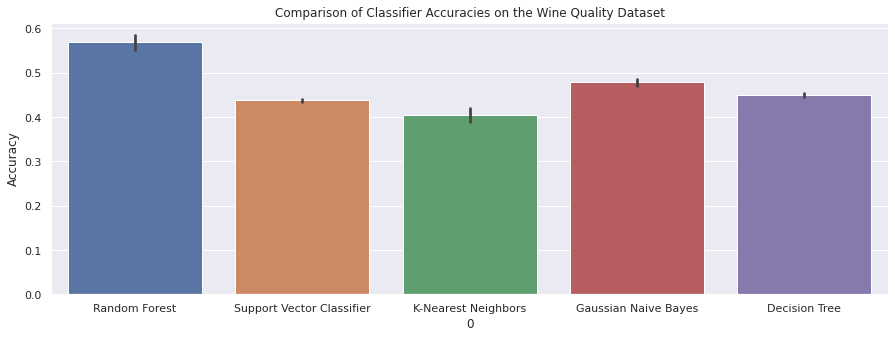

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Classifier', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

accuracies = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for name, clf in classifiers:
    accuracies.append([])
    for train_idx, val_idx in skf.split(X, Y):
        clf.fit(X[train_idx], Y[train_idx])
        Y_pred = clf.predict(X[val_idx])
        accuracy = accuracy_score(Y[val_idx], Y_pred)
        accuracies[-1].append(accuracy)
    print(f"{name} Accuracy: {np.mean(accuracies[-1]):.4f} +/- {np.std(accuracies[-1]):.4f}")

names, acc_values = zip(*classifiers)
plt.figure(figsize=(15,5))
sns.barplot(data=pd.DataFrame([(name, acc) for name, accs in zip(names, accuracies) for acc in accs]), x=0, y=1)
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies on the Wine Quality Dataset')

Based on the provided accuracies, it appears that the dataset may be challenging for the tested models, as none of them achieved particularly high accuracies. The the dataset is small, the algorithms may not have enough data to learn the underlying patterns effectively. Also dataset has imbalanced class distribution, it can be challenging for the machine learning models to accurately predict the minority class.

In conclusion:
1. The Random Forest algorithm demonstrates the highest accuracy (56.92%) among the tested algorithms for this dataset, with a standard deviation of 1.80%. This suggests that the Random Forest model is the most suitable choice for making predictions or classifications using this data. 




# The concept of the neural network implementation

## Activation function in Hidden Layers

In this project, i decided to use The Rectified Linear Unit (ReLU) activation function. It is a popular choice for neural networks due to its simplicity and effectiveness. 

It is defined as the maximum of zero and the input value:

$f(x) = max(0, x)$

I decided on this function because:
1. The ReLU function is computationally efficient to compute, since it only involves a simple element-wise operation.
2. The ReLU function introduces non-linearity to the network, allowing it to learn more complex and non-linear relationships between the input and output data.
3. The ReLU function can make some neurons in the network completely inactive, which helps to reduce the complexity of the network and speed up training.

## Activation function in Output Layer

I decided to use Softmax activation function in the output layer of a neural network for multi-class classification problems (in this project 7 classes). It transforms the output of the network into a probability distribution over the possible classes, ensuring that the predicted class probabilities sum to one. I do this so that I can interpret the data in the output as the probability that a wine with the given feature values belongs to one of the groups.

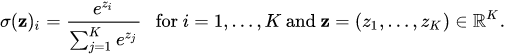

   - $z$ as an input vector to the Softmax function
   - $z_i$ element of the input vector of the Softmax function containing data after standardization
   - $e^z_i$ Exponential function due to which we get a positive value for each element of the input vector. This value will be very small if the input was a negative number.
   - The equation used for normalization. Its task is to limit all values to the range (0,1) typical for determining probability.
   
Pros of using Softmax:
1. The Softmax function can handle multi-class classification problems, where there are more than two possible classes. It produces a probability distribution over all possible classes, allowing the model to make predictions for any of the classes.
2. The Softmax function outputs probabilities for each class, which allows for easy interpretation of the network's output as class probabilities.
3. By producing a probability distribution over all possible classes, the Softmax function encourages exploration of all possible outcomes, instead of just the most likely one. This can help the network to avoid getting stuck in local optima and improve the robustness of the model.

## Learning algorithm as Backpropagation with SGD

In this project, I decided to use the backpropagation algorithm with Stochastic Gradient Descent for training MLP neural network.  It is an extension of the standard backpropagation algorithm, which is used to calculate the gradients of the neural network parameters with respect to the loss function.

The backpropagation algorithm works by propagating the errors from the output layer back to the input layer through the network, updating the weights and biases of each neuron along the way. It does this by using the chain rule of calculus to calculate the derivative of the loss function with respect to each parameter in the network.

In the SGD variant of the algorithm, instead of using the entire training set to calculate the gradients in each iteration, a randomly selected subset, or mini-batch, of the training set is used. This reduces the computational cost of the algorithm and also introduces a level of stochasticity that can help the algorithm avoid getting stuck in local minima.

### The backpropagation with SGD algorithm proceeds as follows:

1. Initialize the weights and biases of the neural network randomly.
2. Repeat for a fixed number of epochs:
    1. Shuffle the training set.
    2. Divide the training set into mini-batches.
    3. For each mini-batch:
        1. Feed the inputs forward through the network and calculate the output.
        2. Calculate the loss between the predicted output and the actual output.
        3. Calculate the gradients of the loss with respect to the parameters in the network using backpropagation.
        4. Update the weights and biases using the gradients and a learning rate, which controls the size of the update.
    4. Evaluate the performance of the model on the validation set.
3. Choose the model with the best performance on the validation set.

## Architecture and Hyperparameters search

### Architecture of Neural Network 
To determine the hyperparameters and network structure I used the implemented neural network from the pytorch library.

In [186]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

class WineQualityClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(WineQualityClassifier, self).__init__()
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Input layer
        self.layers = nn.ModuleList([nn.Linear(input_size, hidden_size)])
        self.layers.extend([nn.ReLU()])

        # Hidden layers
        for _ in range(num_layers - 2):
            self.layers.extend([nn.Linear(hidden_size, hidden_size)])
            self.layers.extend([nn.ReLU()])

        # Output layer
        self.layers.extend([nn.Linear(hidden_size, output_size)])


    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [191]:
def mlp_validation(num_layers=3, hidden_size=8, learning_rate=0.001, epochs=200, batch_size=32, random_seed=0, verbose=True):
    torch.manual_seed(random_seed)

    # Training parameters
    input_size = X.shape[1]
    output_size = len(np.unique(Y))
    
    res = {
        'train_loss': [], 
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    for split_i, (train_idx, val_idx) in enumerate(skf.split(X, Y)):
        X_train = X[train_idx]
        y_train = Y[train_idx]
        X_val = X[train_idx]
        y_val = Y[train_idx]

        # Initialize the neural network, loss function, and optimizer
        model = WineQualityClassifier(input_size, hidden_size, output_size, num_layers)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Data loaders
        train_loader = DataLoader(TensorDataset(torch.tensor(X_train).to(dtype=torch.float32), torch.tensor(y_train)), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(TensorDataset(torch.tensor(X_val).to(dtype=torch.float32), torch.tensor(y_val)), batch_size=batch_size, shuffle=False)

        # Training loop
        for epoch in range(1, epochs + 1):
            # Train
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0
            for inputs, labels in train_loader:
                optimizer.zero_grad()

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
#                 with torch.inference_mode():
#                     for param in model.parameters():
#                         param.data.clamp_(-1, 1)
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

            train_loss = running_loss / len(train_loader)
            train_acc = correct / total

            # Validate
            model.eval()
            running_loss = 0.0
            correct = 0
            total = 0
            with torch.inference_mode():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    running_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    correct += (predicted == labels).sum().item()
                    total += labels.size(0)

            val_loss = running_loss / len(train_loader)
            val_acc = correct / total

            if verbose:
                print(f'Epoch {epoch:5d}, train_loss={train_loss:2.3f}, train_acc={train_acc:.3f}, val_loss={val_loss:2.3f}, val_acc={val_acc:.3f}')
        res['train_loss'].append(train_loss)
        res['train_acc'].append(train_acc)
        res['val_loss'].append(val_loss)
        res['val_acc'].append(val_acc)
            
    return res

In [187]:
from functools import partial

def evaluate_hps(hps, **kwargs):
    '''
    unpacks mlp_validation function with 'val_acc' value
    '''
    return np.mean(mlp_validation(**hps, **kwargs)['val_acc'])

def random_search(iterations, reps, pool=__builtins__):
    '''
    performs a random search to find best hyperparameters for the model.
    `iterations` different hyperparameters are randomized, and evaluated `reps` times (with different random seeds)
    returns best hyperparameters and accuracy
    '''
    args = [
        dict(learning_rate=10 ** np.random.normal(-2.5, 1.5),
             hidden_size=round(2 ** np.random.uniform(0, 8)),
             batch_size=np.random.randint(1, 128),
             epochs=np.random.randint(1, 32),
             num_layers=np.random.randint(2, 8))
        for i in range(iterations)
    ]
    accs = np.array([
        list(tqdm(pool.map(partial(evaluate_hps, verbose=False), [a | {'random_seed': j} for a in args]), total=len(args)))
        for j in range(reps)
    ])
    accs = accs.mean(0)
    i = accs.argmax()
    return args[i], accs[i]

### Optimal Hyperparameters

In [190]:
%%time
random_search(150, 1)

100%|█████████████████████████████████████████| 150/150 [50:50<00:00, 20.34s/it]

CPU times: user 3h 16min 31s, sys: 23.7 s, total: 3h 16min 55s
Wall time: 50min 50s


({'learning_rate': 0.00208642992701708,
  'hidden_size': 21,
  'batch_size': 63,
  'epochs': 30,
  'num_layers': 5},
 0.5160244360902255)

These hyperparameters have been selected as the best configuration for the MLP model based on the given dataset and training setup.

Using cross-validation with 5 splits can help to improve the generalization of the model by evaluating its performance on different subsets of the data. 


The optimal hyperparameters with Cross-Validation with 5 splits for MLP based on 150 iteration and 1 repetition:

1. learning_rate 0.002
2. hidden_size 21
3. batch_size 63
4. epochs 30
5. layers 5